📊 Summary Statistics Table (Mean, Median, Std Dev):


GHI                    DNI                    DHI         \
                mean median     std    mean median     std    mean median   
Country                                                                     
Benin         240.34    1.8  330.86  167.15   -0.1  261.68  110.90    1.5   
Sierra Leone  196.73    0.1  291.12  104.11   -0.1  201.09  109.35   -0.3   
Togo          229.85    2.1  321.64  149.22    0.0  248.40  112.35    2.5   

                      
                 std  
Country               
Benin         152.91  
Sierra Leone  153.56  
Togo          151.23


📦 Boxplots:


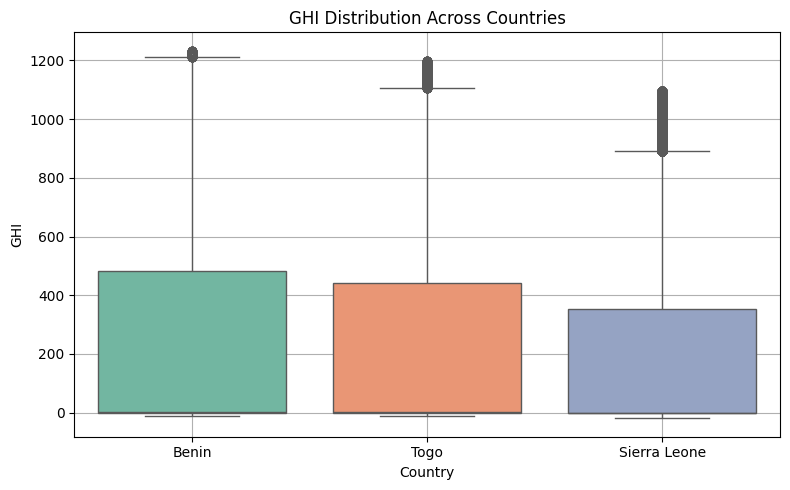

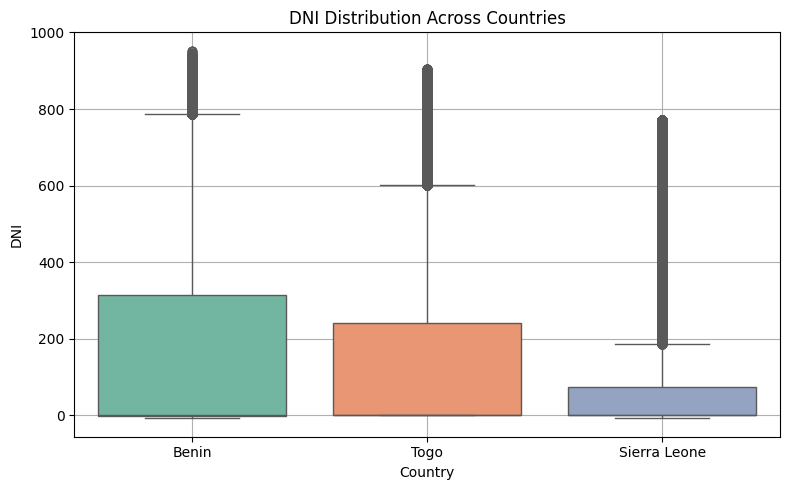

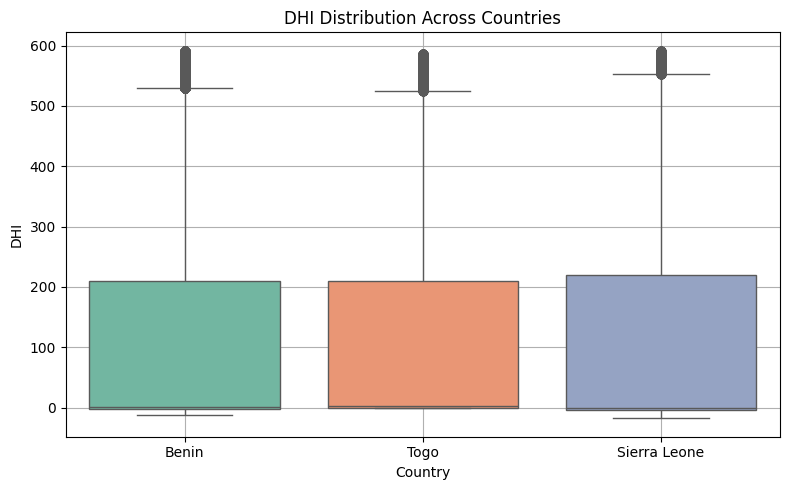


🧪 ANOVA Test Results:
GHI: F = 2738.3, p = 0.0
DNI: F = 9728.55, p = 0.0
DHI: F = 51.02, p = 0.0

🏆 Ranking Countries by Average GHI:


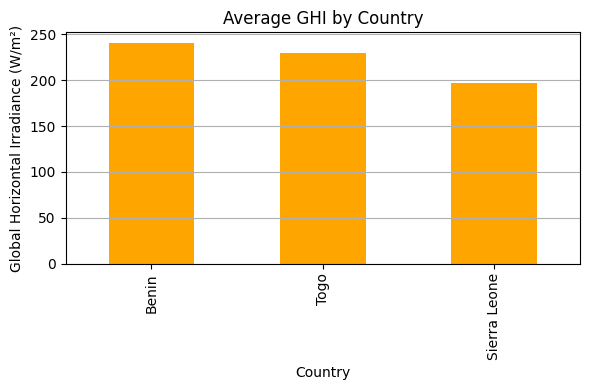

GHI                    DNI                    DHI         \
                mean median     std    mean median     std    mean median   
Country                                                                     
Benin         240.34    1.8  330.86  167.15   -0.1  261.68  110.90    1.5   
Sierra Leone  196.73    0.1  291.12  104.11   -0.1  201.09  109.35   -0.3   
Togo          229.85    2.1  321.64  149.22    0.0  248.40  112.35    2.5   

                      
                 std  
Country               
Benin         152.91  
Sierra Leone  153.56  
Togo          151.23

### 🔍 Key Observations:

- Benin has the highest average GHI, showing strong solar potential.
- Benin displays the greatest variability in DNI, which may suggest inconsistent sunlight.
- Sierra Leone maintains the most consistent irradiance, making it a reliable region for solar deployment.


In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway
from IPython.display import display

class CrossCountryComparison:
    def __init__(self, file_paths):
        self.file_paths = file_paths
        self.metrics = ['GHI', 'DNI', 'DHI']
        self.datasets = self.load_and_label_data()

    def load_and_label_data(self):
        datasets = {}
        for country, path in self.file_paths.items():
            df = pd.read_csv(path)
            df['Country'] = country
            datasets[country] = df
        return datasets

    def concat_data(self):
        return pd.concat(self.datasets.values(), ignore_index=True)

    def summary_statistics(self):
        full_data = self.concat_data()
        summary = full_data.groupby("Country")[self.metrics].agg(['mean', 'median', 'std']).round(2)
        display(summary)  # Show nicely in Jupyter
        return summary

    def plot_boxplots(self):
        full_data = self.concat_data()
        for metric in self.metrics:
            plt.figure(figsize=(8, 5))
            sns.boxplot(x='Country', y=metric, hue='Country', data=full_data, palette='Set2', legend=False)
            plt.title(f'{metric} Distribution Across Countries')
            plt.xlabel('Country')
            plt.ylabel(metric)
            plt.grid(True)
            plt.tight_layout()
            plt.show()

    def perform_anova(self):
        results = {}
        for metric in self.metrics:
            groups = [df[metric].dropna() for df in self.datasets.values()]
            f_stat, p_val = f_oneway(*groups)
            results[metric] = {'F-stat': round(f_stat, 2), 'p-value': round(p_val, 4)}
        return results

    def plot_average_ghi(self):
        full_data = self.concat_data()
        avg_ghi = full_data.groupby('Country')['GHI'].mean().sort_values(ascending=False)
        avg_ghi.plot(kind='bar', color='orange', figsize=(6, 4), title='Average GHI by Country')
        plt.ylabel('Global Horizontal Irradiance (W/m²)')
        plt.xlabel('Country')
        plt.grid(axis='y')
        plt.tight_layout()
        plt.show()

    def print_summary_observations(self):
        summary = self.summary_statistics()
    
        # Flatten MultiIndex columns for easier access
        flat = summary.copy()
        flat.columns = ['_'.join(col) for col in flat.columns]
    
        # Highest average GHI
        top_avg_ghi = flat['GHI_mean'].idxmax()
    
        # Highest DNI variability
        top_dni_variability = flat['DNI_std'].idxmax()
    
        # Country with most balanced irradiance (lowest combined std dev of GHI, DNI, DHI)
        flat['total_std'] = flat[['GHI_std', 'DNI_std', 'DHI_std']].sum(axis=1)
        most_balanced = flat['total_std'].idxmin()
    
        print("### 🔍 Key Observations:\n")
        print(f"- {top_avg_ghi} has the highest average GHI, showing strong solar potential.")
        print(f"- {top_dni_variability} displays the greatest variability in DNI, which may suggest inconsistent sunlight.")
        print(f"- {most_balanced} maintains the most consistent irradiance, making it a reliable region for solar deployment.")

file_paths = {
    'Benin': '../data/benin-malanville_clean.csv',
    'Togo': '../data/togo-dapaong_qc_clean.csv',
    'Sierra Leone': '../data/sierraleone-bumbuna_clean.csv'
}

# Execute Comparision
comparison = CrossCountryComparison(file_paths)

print("📊 Summary Statistics Table (Mean, Median, Std Dev):")
summary_stats = comparison.summary_statistics()

print("\n📦 Boxplots:")
comparison.plot_boxplots()

print("\n ANOVA Test Results:")
anova_results = comparison.perform_anova()
for metric, result in anova_results.items():
    print(f"{metric}: F = {result['F-stat']}, p = {result['p-value']}")

print("\n🏆 Ranking Countries by Average GHI:")
comparison.plot_average_ghi()

comparison.print_summary_observations()